In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import quantecon_book_networks
import quantecon_book_networks.input_output as qbn_io
import quantecon_book_networks.plotting as qbn_plt
import quantecon_book_networks.data as qbn_data
import matplotlib as mpl
from matplotlib.patches import Polygon

In [3]:
red = pd.read_csv('../resources/MIP_normalizada.csv')
red.drop(columns = red.columns[0],axis=1, inplace=True)
red_n = red.to_numpy()

In [3]:
print(red_n)

[[1.03188249e-02 0.00000000e+00 2.18039590e-02 ... 0.00000000e+00
  7.66528691e-09 3.66751819e-03]
 [0.00000000e+00 1.67226270e-01 1.30823803e-02 ... 8.64939875e-03
  5.28904797e-07 8.63808675e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  4.59917214e-08 4.72904899e-07]
 ...
 [2.76564204e-04 6.34388571e-04 5.72864464e-04 ... 0.00000000e+00
  1.51403980e-03 0.00000000e+00]
 [1.21393082e-04 2.48151657e-04 2.19734213e-04 ... 4.89847519e-02
  8.85082931e-02 4.41962067e-03]
 [6.10507698e-03 1.78212137e-04 1.98408512e-03 ... 4.19004252e-01
  2.29816263e-01 5.43356981e-02]]


In [15]:
red[89]

Cultivo de cereales, oleaginosas y forrajeras  \
0                                         0.010319   
1                                         0.000000   
2                                         0.000000   
3                                         0.000000   
4                                         0.097189   
..                                             ...   
115                                       0.000000   
116                                       0.000004   
117                                       0.000277   
118                                       0.000121   
119                                       0.006105   

     Cultivo de hortalizas, legumbres, flores y plantas ornamentales  \
0                                             0.000000                 
1                                             0.167226                 
2                                             0.000000                 
3                                             0.000000                 
4                                             0.021008                 
..                                                 ...                 
115                                           0.000000                 
116                                           0.000009                 
117                                           0.000634                 
118                                           0.000248                 
119                                           0.000178                 

     Cultivo de frutas y nueces  Cultivos industriales  \
0                      0.021804               0.005831   
1                      0.013082               0.000000   
2                      0.000000               0.000000   
3                      0.000000               0.020212   
4                      0.052329               0.007799   
..                          ...                    ...   
115                    0.000000               0.000000   
116                    0.000009               0.000004   
117                    0.000573               0.000253   
118                    0.000220               0.000100   
119                    0.001984               0.006168   

     Producción de semillas  \
0                  0.000000   
1                  0.000000   
2                  0.000000   
3                  0.000000   
4                  0.021740   
..                      ...   
115                0.000000   
116                0.000004   
117                0.000273   
118                0.000100   
119                0.001611   

     Cría de ganado y producción de leche, lana y pelos  Producción de granja  \
0                                             0.152144               0.058182   
1                                             0.000000               0.000000   
2                                             0.000000               0.000000   
3                                             0.000000               0.000000   
4                                             0.013291               0.001349   
..                                                 ...                    ...   
115                                           0.000172               0.001199   
116                                           0.000004               0.000005   
117                                           0.000254               0.000418   
118                                           0.000108               0.000606   
119                                           0.004978               0.001942   

     Servicios agropecuarios      Caza  Silvicultura y extracción de madera  \
0                   0.000000  0.000000                             0.000000   
1                   0.000000  0.000000                             0.000000   
2                   0.000000  0.000000                             0.000000   
3                   0.000000  0.000000                             0.000000   
4                   0.000000  0.000000               

In [2]:
def verGrafoCentralizado(G, df):
    ig, ax = plt.subplots(figsize=(40, 40))
    plt.axis("off")
    N = len(G)
    centrality = nx.eigenvector_centrality(G, max_iter=1000) #Funcion para sacar colores lindos para el grafo.
    values = np.array(list(centrality.values()))
    norm_values = (values - values.min()) / (values.max() - values.min())
    
    colores_nodo = plt.cm.viridis(norm_values)
    
    grado_nodo = np.array([G.out_degree[(sector)] for sector in df.columns])
    tamaños_nodo = 400 + (grado_nodo * 200)
    edge_widths = qbn_io.normalise_weights(qbn_io.edge_weights(G),10)
    
    node_colors = qbn_io.colorise_weights(list(centrality),beta = False)
    node_to_color = dict(zip(G.nodes,node_colors))
    edge_colors = []
    for src,_ in G.edges:
        edge_colors.append(node_to_color[src])
    
    pos_nodos = nx.spring_layout(G)
    
    nx.draw_networkx_nodes(G,
                           pos_nodos,
                           node_color=colores_nodo,
                           node_size=tamaños_nodo,
                           edgecolors='grey',
                           linewidths=10,
                           alpha=0.6,
                           ax=ax
                           )
    
    nx.draw_networkx_edges(G,
                          pos_nodos,
                          edge_color=edge_colors,
                          width=edge_widths,
                          arrows=True,
                          arrowsize=5,
                          alpha=0.6,
                          ax=ax,
                          arrowstyle='->',
                          node_size= 10,
                          connectionstyle='arc3,rad=0.15')
    
    nx.draw_networkx_labels(G,
                           pos_nodos,
                           font_size=17,
                           ax=ax,
                            labels=None
    )
    
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=values.min(), vmax=values.max()))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax = ax, font_size= 15)
    cbar.set_label('Eigenvector Centrality', font_size= 15)
    
    plt.show()

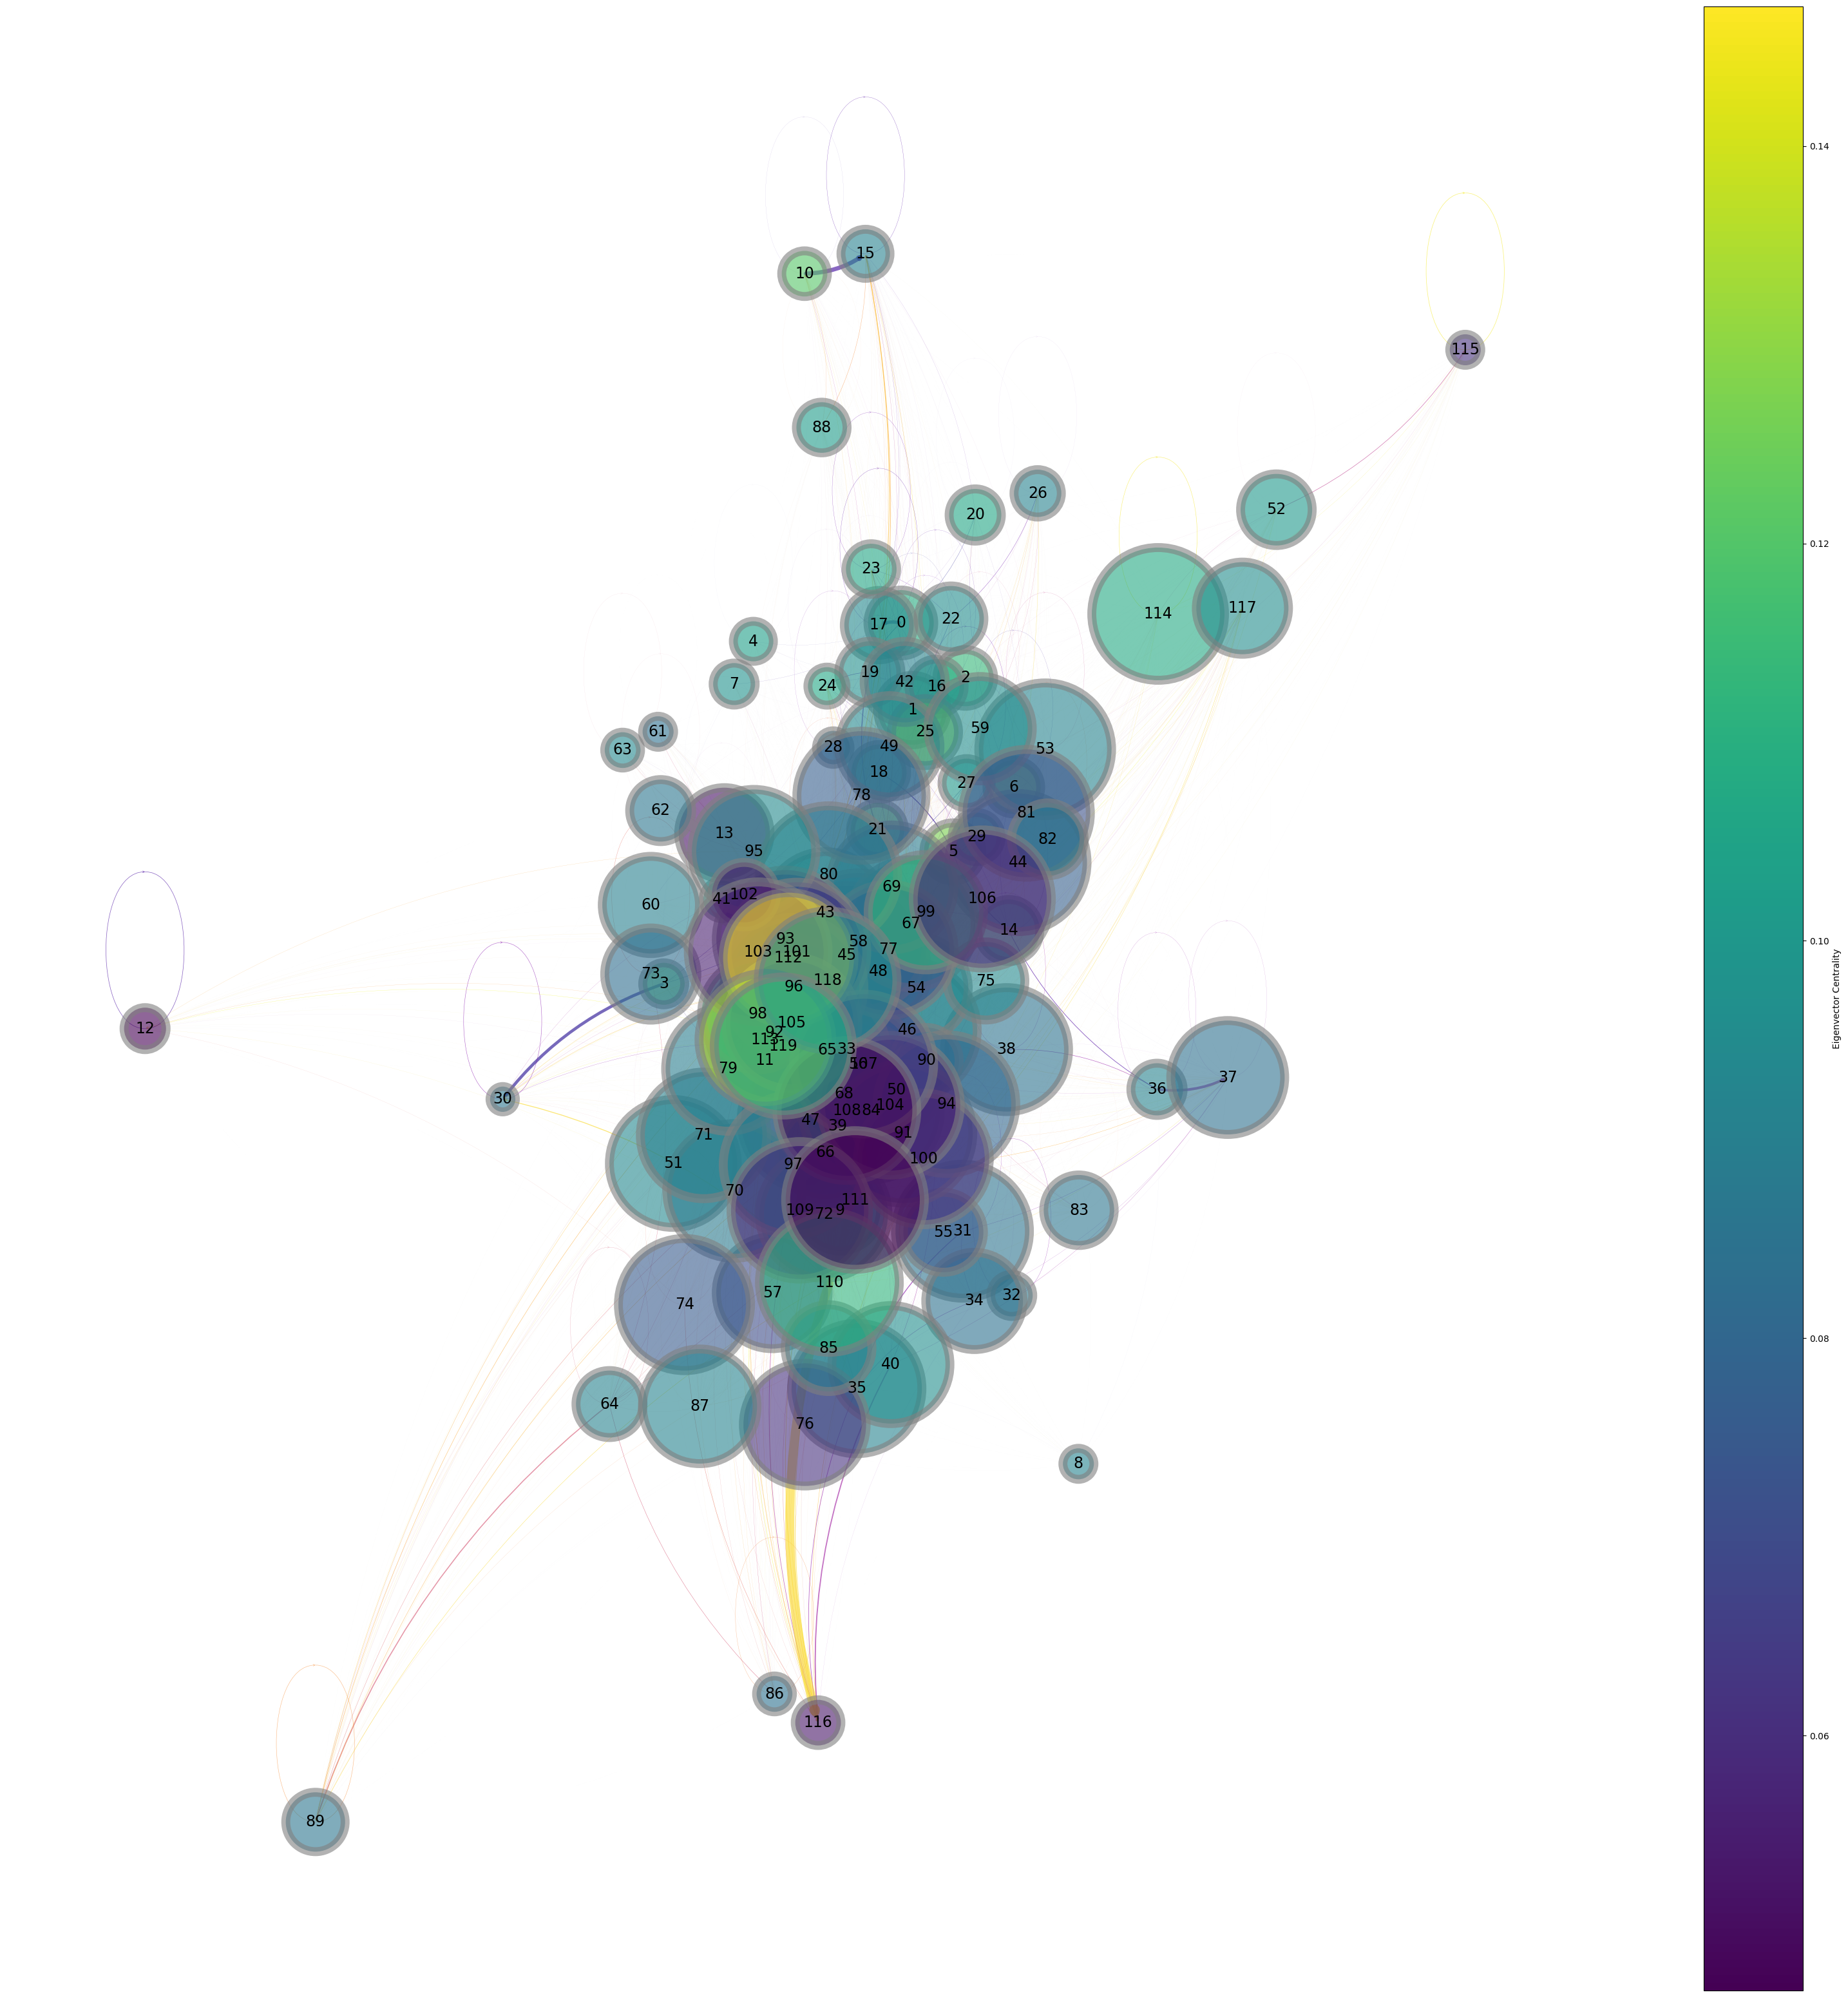

In [34]:
G = nx.DiGraph(red_n)
verGrafoCentralizado(G)

In [43]:
def verGrafoAbierto(G):      
    fig, ax = plt.subplots(figsize=(25, 25))
    plt.axis("off")
    
    N = len(G)
    
    centrality = nx.eigenvector_centrality(G, max_iter=1000) #Funcion para sacar colores lindos para el grafo.
    values = np.array(list(centrality.values()))
    norm_values = (values - values.min()) / (values.max() - values.min())
    colores_nodo = plt.cm.viridis(norm_values)
    
    grado_nodo = np.array([G.out_degree[(sector)] for sector in df.columns])
    tamaños_nodo = 400 + (grado_nodo * 200)
    tamaños_nodo.tolist()
    
    node_colors = {node: colores_nodo[i] for i, node in enumerate(G.nodes())}
    edge_colors = [node_colors[u] for u, v in G.edges()]
    edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
    max_weight = max(edge_weights)
    norm_edge_weights = [10 * (w / max_weight) for w in edge_weights]  # Normalize and scale edge weights
    

    pos_nodos = nx.spring_layout(G, seed=42, k=0.5)
    
    nx.draw_networkx_nodes(G,
                           pos_nodos,
                           node_color=colores_nodo,
                           node_size=tamaños_nodo,
                           edgecolors='grey',
                           linewidths=10,
                           alpha=0.6,
                           ax=ax
                           )
    
    nx.draw_networkx_edges(G,
                          pos_nodos,
                          edge_color=edge_colors,
                          width=norm_edge_weights,
                          arrows=True,
                          arrowsize=5,
                          alpha=0.6,
                          ax=ax,
                          arrowstyle='->',
                          node_size= 10,
                          connectionstyle='arc3,rad=0.15')
    
    nx.draw_networkx_labels(G,
                           pos_nodos,
                           font_size=12,
                           ax=ax
    )
    
    
    plt.show()

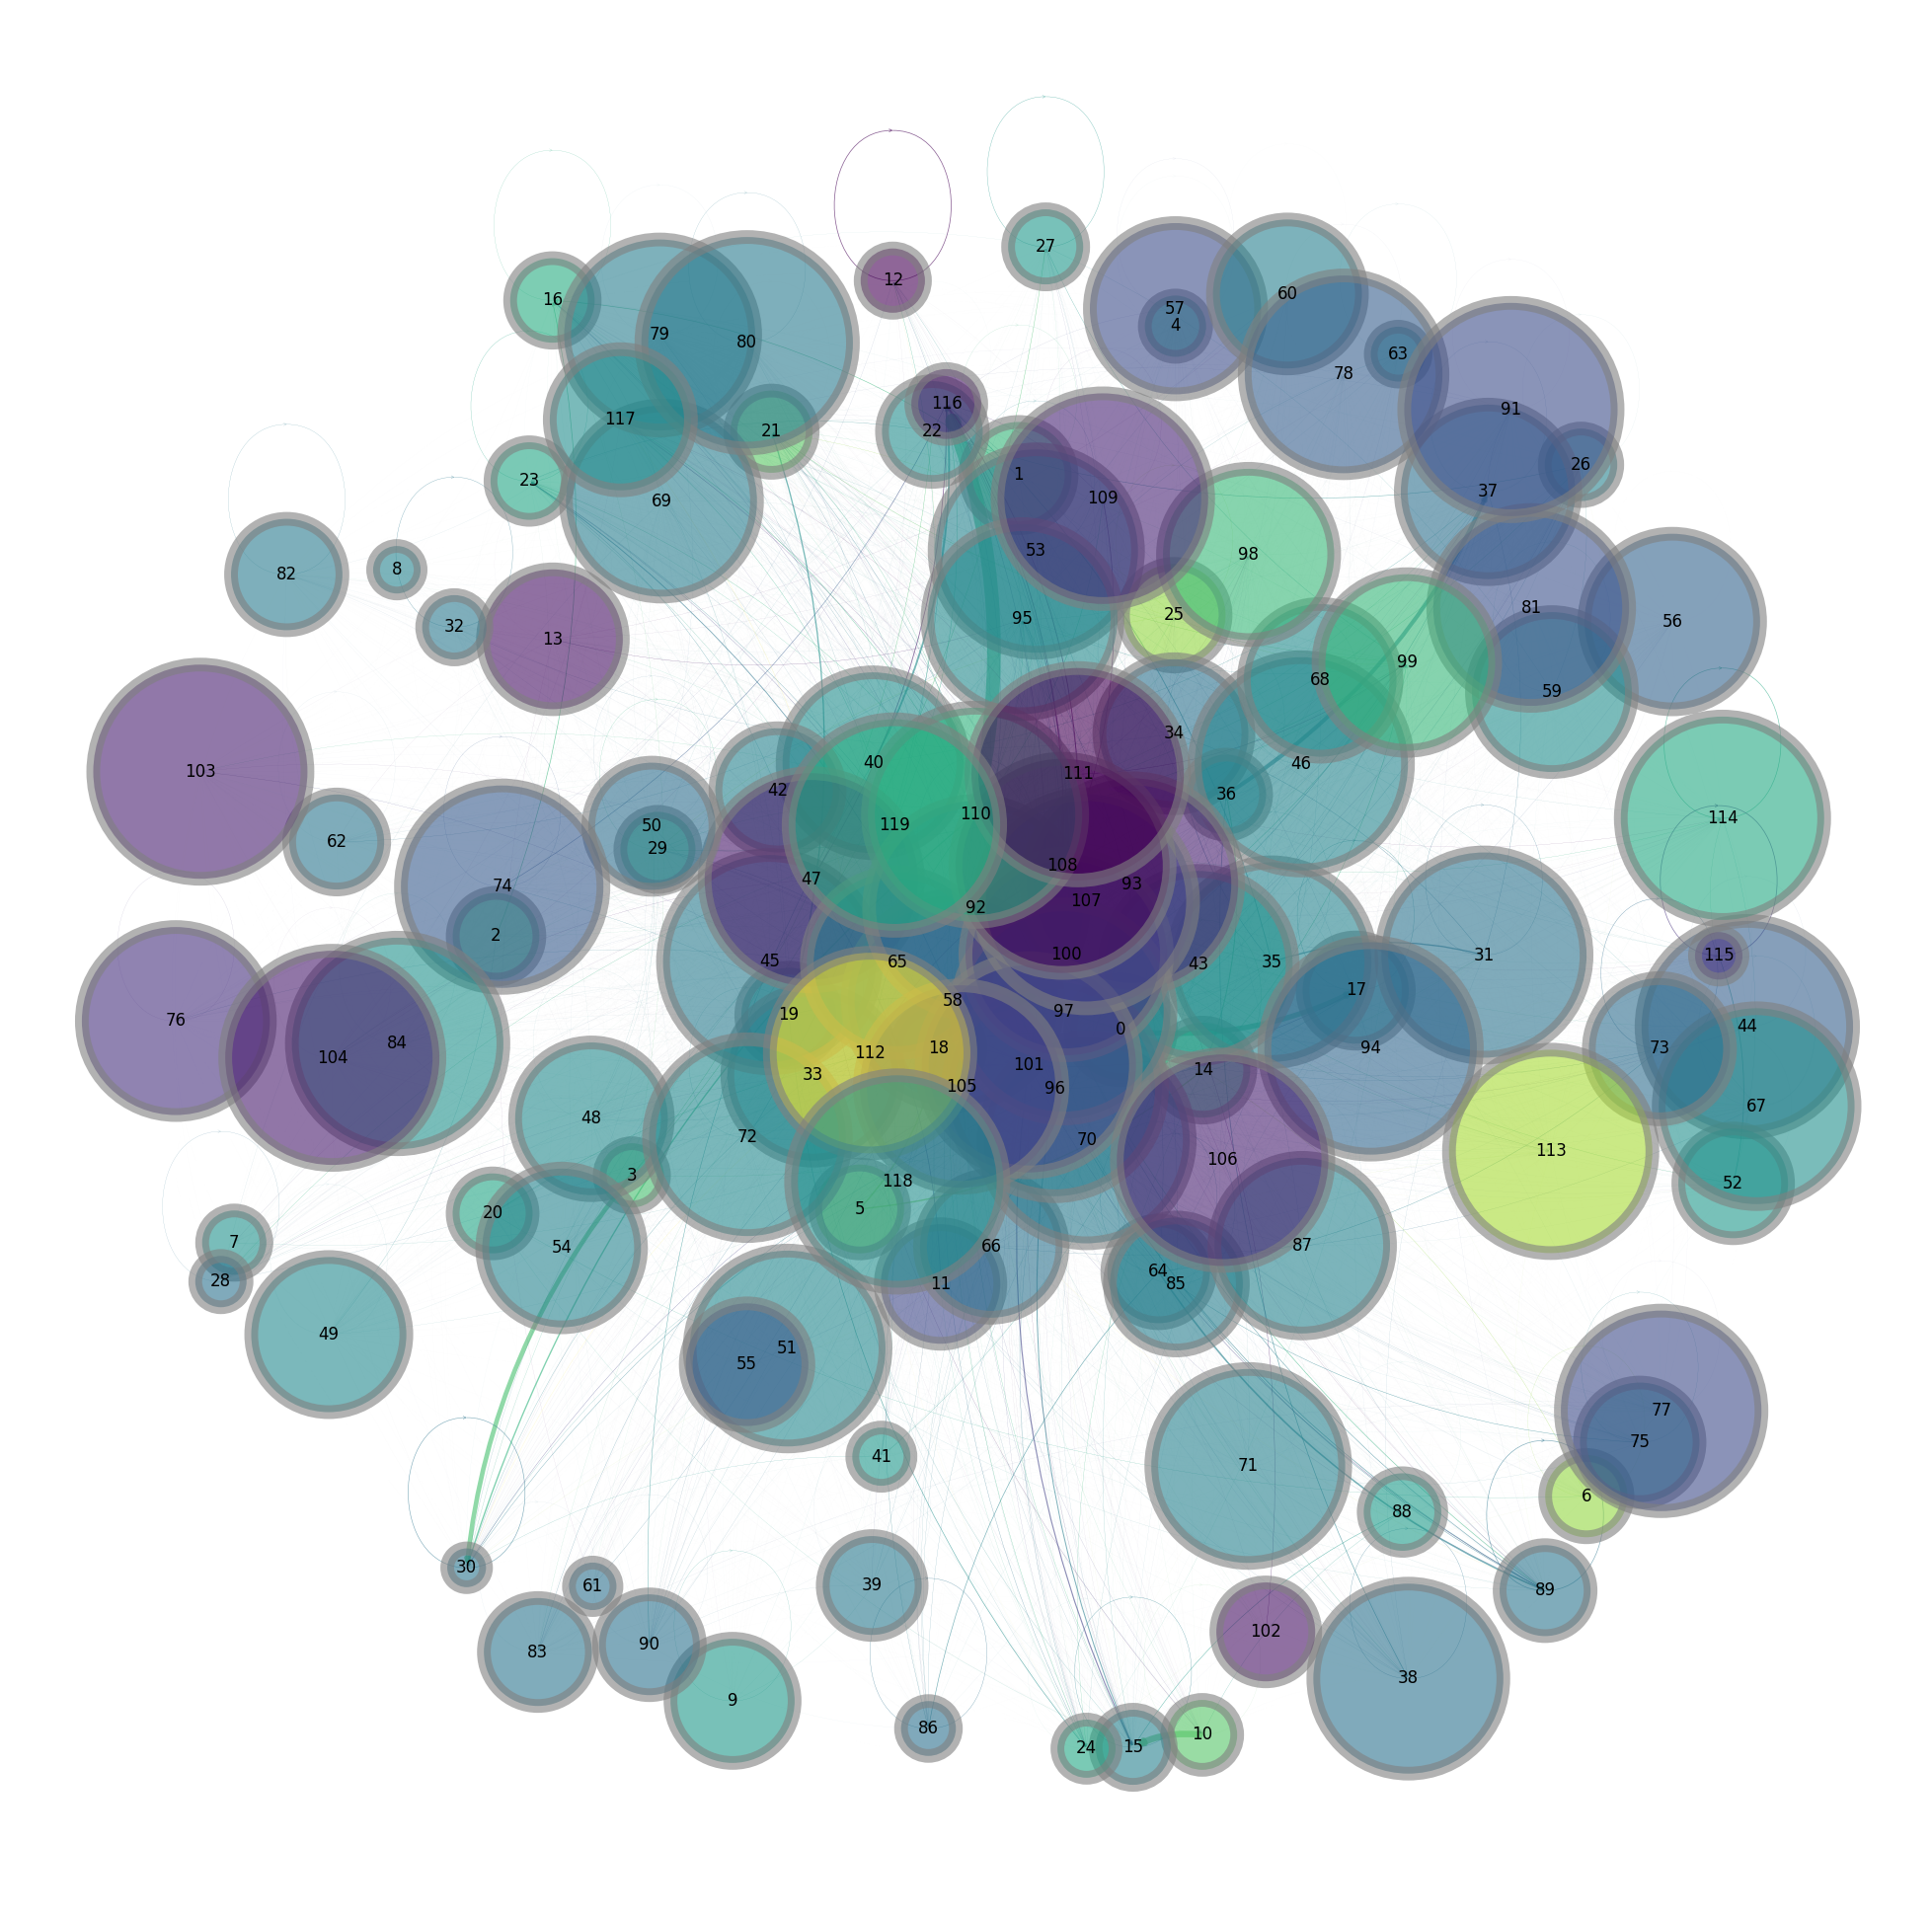

In [44]:
verGrafoAbierto(G)

In [64]:
def verInflacion(G, precios_finales, precios_iniciales):
    N = len(G)
    grado_nodo = np.array([G.out_degree[(sector)] for sector in df.columns])
      
    fig, ax = plt.subplots(figsize=(25, 25))
    plt.axis("off")
    
    price_changes = np.array(precios_finales) - np.array(precios_iniciales)
    
    max_change = max(price_changes)
    min_change = min(price_changes)
    norm_changes = (price_changes - min_change) / (max_change - min_change)
            
    colors = plt.cm.Reds(norm_changes)
    tamaños_nodo = 400 + (grado_nodo * 200)
    tamaños_nodo.tolist() 
    
    edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
    max_weight = max(edge_weights)
    norm_edge_weights = [10 * (w / max_weight) for w in edge_weights]
    
    pos_nodos = nx.spring_layout(G)
    
    nx.draw_networkx_nodes(G,
                           pos_nodos,
                           node_color=colors,
                           node_size=tamaños_nodo,
                           edgecolors=None,
                           linewidths=10,
                           alpha=1,
                           ax=ax
                           )
    
    nx.draw_networkx_edges(G,
                          pos_nodos,
                          edge_color='gray',
                          width=norm_edge_weights,
                          arrows=True,
                          arrowsize=5,
                          alpha=0.6,
                          ax=ax,
                          arrowstyle='->',
                          node_size= 10,
                          connectionstyle='arc3,rad=0.15')
    
    nx.draw_networkx_labels(G,
                           pos_nodos,
                           font_size=12,
                           ax=ax
    )
    
    
    plt.show()

In [58]:
sectores = ['luz','chapa','campo','chip','comida']

pesos = np.array([[0,0.25,0.1,0.2,0.5],[0.3,0.4,0,0.7,0.15],[0,0.9,0,0.1,0.8],[0.1,0,0.2,0,0],[0.5,0,0,0,0]])
test = pd.DataFrame(data=pesos,columns=sectores,index=sectores)

pesos_ciclo = np.array([[0,0.25,0.1,0,0],[0,0,0,0.7,0.15],[0,0,0,0,0.8],[0.2,0,0,0,0],[0,0,0,0,0]])
test_ciclo = pd.DataFrame(data=pesos_ciclo,columns=sectores,index=sectores)

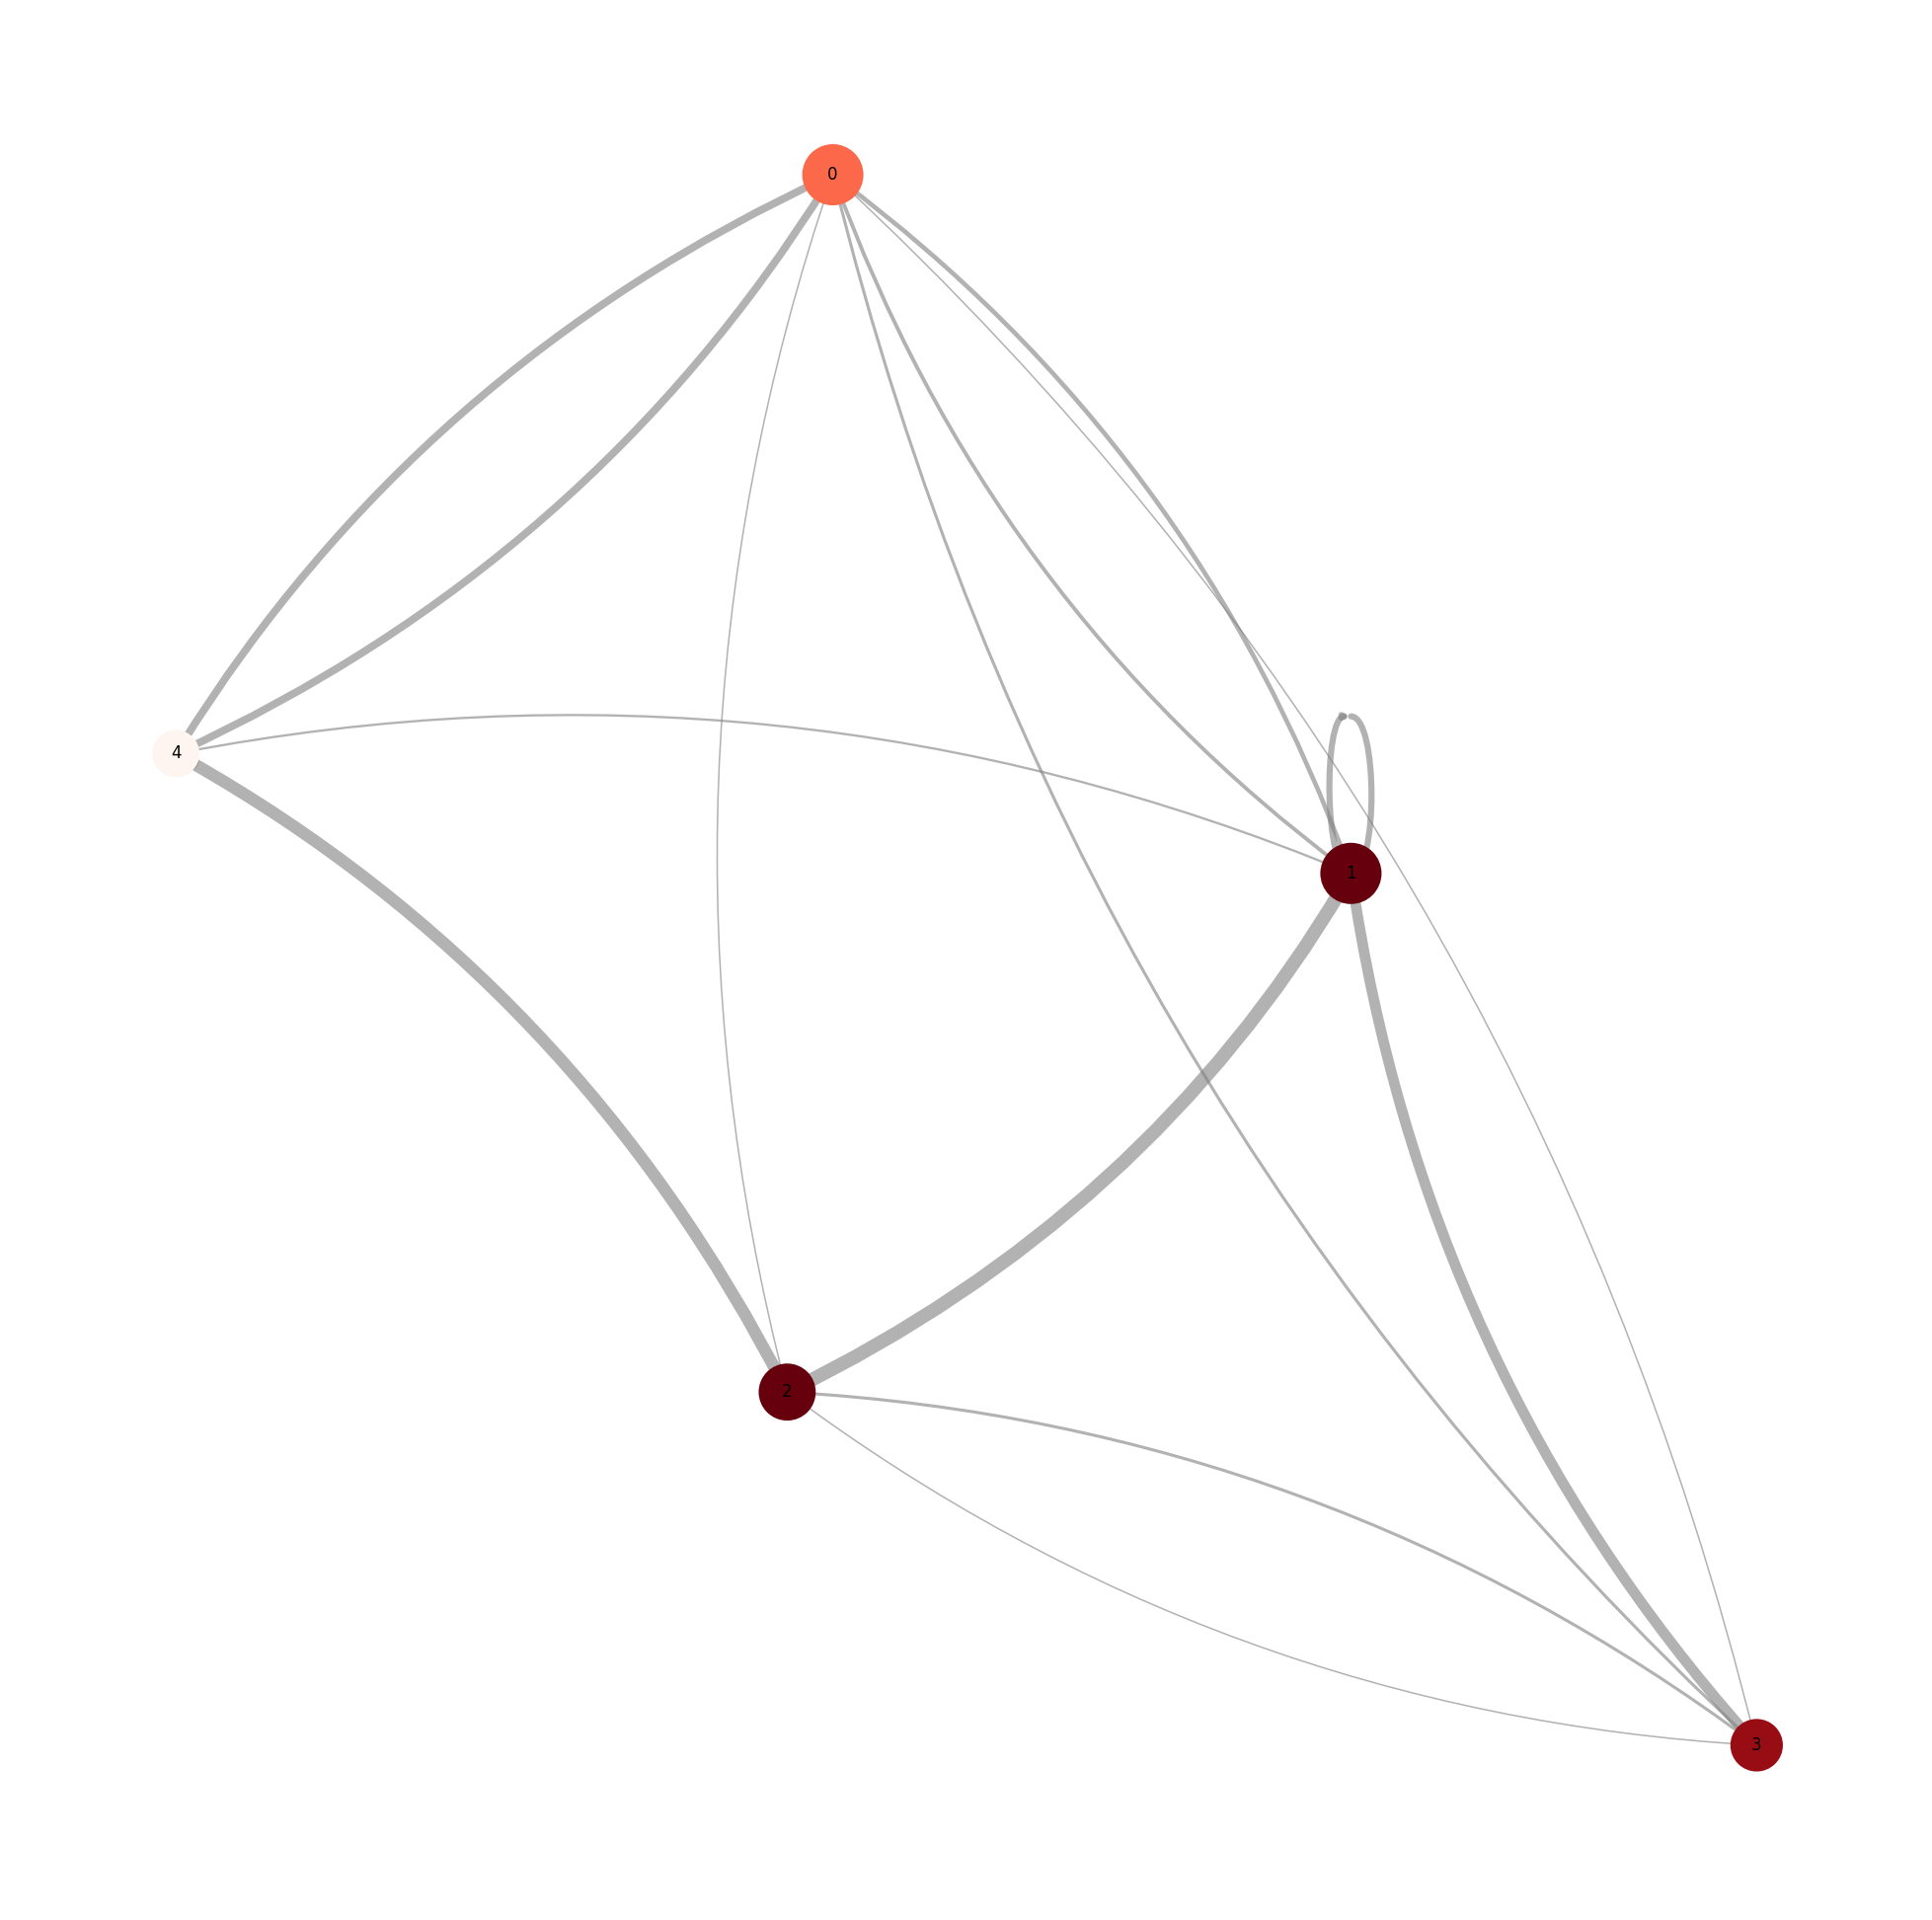

In [66]:
verInflacion(nx.DiGraph(test.to_numpy()), [100,100,100,100,100], [200,100,100,120,300])